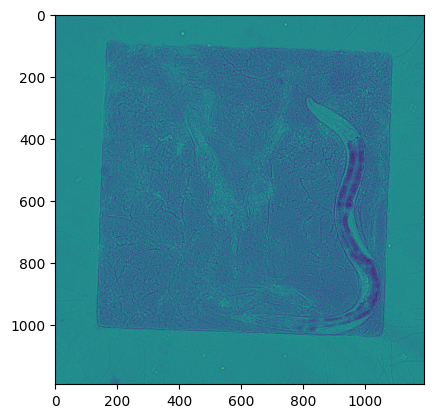

1.8734525 -0.33837688


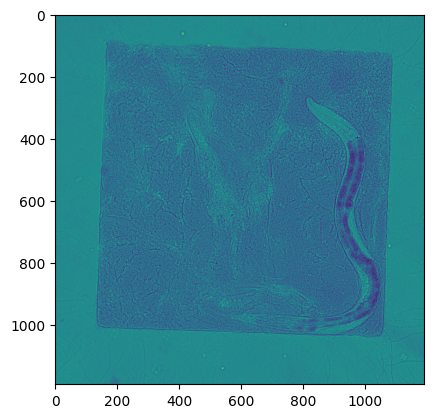

In [8]:
import os
import torch
import cv2
import random
import imageio

import numpy as np
import matplotlib.pyplot as plt
import pretrained_microscopy_models as pmm
import segmentation_models_pytorch as smp
import albumentations as albu
from albumentations.pytorch import ToTensorV2
from skimage import img_as_ubyte
from skimage.color import gray2rgb

from pathlib import Path
from torch.utils.data import DataLoader
from torch.utils.data import Dataset as BaseDataset
from towbintools.foundation.image_handling import read_tiff_file
import torch.nn.functional as F
from utils.augmentation import get_training_augmentation

from pytorch_toolbelt import inference
import pandas as pd
from towbintools.foundation import image_handling
from csbdeep.utils import normalize
# img = read_tiff_file('/home/spsalmon/towbintools/towbintools/deep_learning/spot4_180d_2.tif')

database_csv = "/mnt/external.data/TowbinLab/plenart/20221020_Ti2_10x_green_bacteria_wbt150_small_chambers_good/analysis/report/analysis_filemap.csv"

image_column = 'raw'
mask_column = 'analysis/ch2_seg'

database = pd.read_csv(database_csv).dropna(subset=[mask_column])
database = database.dropna(subset=[image_column])

# pick 10000 random images
database = database.sample(n=10, random_state=42)

img = read_tiff_file(database[image_column].iloc[2], [2])
plt.imshow(img)
plt.show()

normalized_img = normalize(img, 1, 99, axis=(0, 1))

print(normalized_img.max(), normalized_img.min())
plt.imshow(normalized_img)
plt.show()

In [2]:


# set random seeds for repeatability
random.seed(0)
np.random.seed(0)
torch.manual_seed(0);



torch.Size([3, 512, 512])


TypeError: Invalid shape (3, 512, 512) for image data

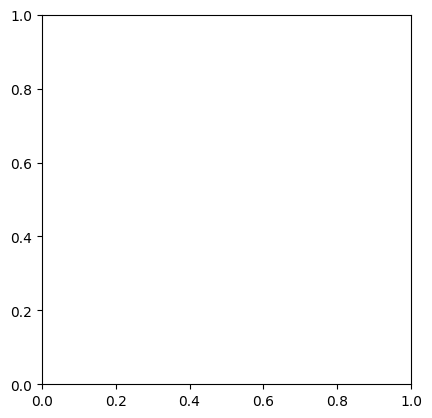

In [3]:
print(img.shape)
plt.imshow(img)
plt.show()


albu_transform = get_training_augmentation(884.7027034255213, 134.14329793778992)

transfo = albu_transform(image=img, mask=mask)
img_mod = transfo['image']
mask_mod = transfo['mask']

plt.imshow(img_mod.squeeze())
plt.show()

print(img_mod.shape)

torch.Size([1192, 1192])


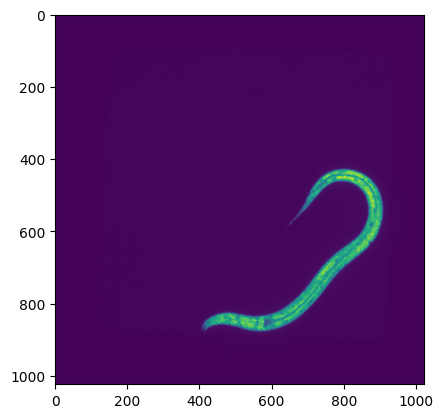

In [ ]:
def grayscale_to_rgb_pytorch(grayscale_img):
    img = np.expand_dims(grayscale_img, axis=0)
    stacked_img = np.stack((img,)*3, axis=0)
    stacked_img = np.squeeze(stacked_img)
    return stacked_img

image_dir = "/mnt/external.data/TowbinLab/plenart/20221020_Ti2_10x_green_bacteria_wbt150_small_chambers_good/raw/"
images = [os.path.join(image_dir, f)
					   for f in os.listdir(image_dir) if f.endswith(".tiff")]


image = read_tiff_file(images[8880], [1]).astype(np.float32)
image = torch.from_numpy(image).float()
print(image.shape)
image = F.interpolate(image.unsqueeze(0).unsqueeze(0), size=(1024, 1024), mode='bilinear', align_corners=True).squeeze()
# image = read_tiff_file('spot4_180d_2.tif')
plt.imshow(image)
plt.show()

image = grayscale_to_rgb_pytorch(image)

In [ ]:
test = model(torch.tensor(image.astype(np.float32)).unsqueeze(0))

NameError: name 'model' is not defined

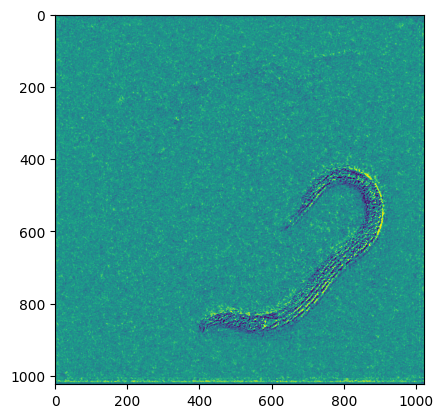

In [ ]:
plt.imshow(test.detach().numpy().squeeze())
plt.show()

In [ ]:
# print the number of parameters in the model
print(f'Number of parameters in the model: {sum([np.prod(p.size()) for p in model.parameters()])}')

Number of parameters in the model: 20813113
